In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = np.array([[1.0, 3.0], [2.0, 1.0], [3.5,4.], [5., 0.], [6., 0.5], [9., -2.], [9.5, -3.0]])

In [58]:
def h(i):
    return data[i+1][0] - data[i][0]

def b(i):
    return (6/h(i)) * (data[i+1][1] - data[i][1])

def u(i):
    if i == 1:
        return 2*(h(i-1) + h(i))
    return 2*(h(i-1) + h(i)) - (h(i-1)**2)/u(i-1)

def v(i):
    if i == 1:
        return b(i) - b(i-1)
    return b(i) - b(i-1) - h(i-1) * (v(i-1)/u(i-1))

def z(i):
    if i == 0 or i == len(data)-1:
        return 0
    else:
        return (v(i) - h(i)*z(i+1))/u(i)
    
def A(i):
    return (z(i+1) - z(i))/(6*h(i))

def B(i):
    return z(i)/2

def C(i):
    return (-h(i)/6) * (z(i+1)+2*z(i)) + (data[i+1][1] - data[i][1])/h(i)

def S(i, x):
    return data[i][1] + (x - data[i][0]) * (C(i) + (x-data[i][0]) * (B(i) + (x-data[i][0])*A(i)))


zadanie 1

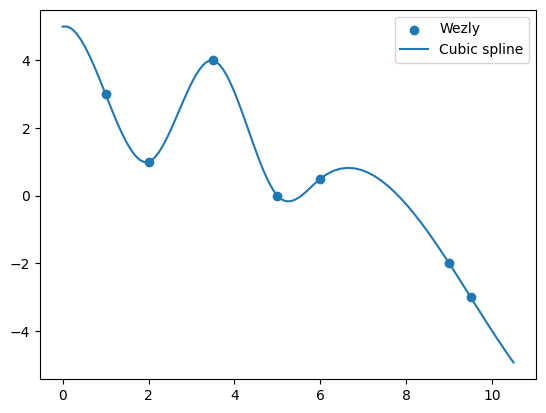

In [59]:
cs_y = []
x_space = []


for i in range(data.shape[0]-1):
    if i == 0:
        iksy = np.linspace(0, data[i+1][0], 20)
    elif i == data.shape[0]-2:
        iksy = np.linspace(data[i][0], 10.5, 20)
    else:
        iksy = np.linspace(data[i][0], data[i + 1][0], 20)

    x_space.extend(iksy)
    interpolated = S(i, iksy)
    cs_y.extend(interpolated)
else:
    plt.scatter(data[:,0], data[:,1], label='Wezly')
    plt.plot(x_space, cs_y, label='Cubic spline')
    plt.legend()
    plt.show()

zadanie 2

In [60]:
def s(x, yi, yi1, ti, ti1):
    return ((yi1-yi)/(ti1-ti)) * (x - ti) + yi

In [61]:
def Lagrange_interpol(x, wezly, stopien):
    suma = 0
    for i in range(stopien+1):
        iloczyn = 1
        for j in range(stopien+1):
            if i != j:
                iloczyn *= (x-wezly[j])/(wezly[i]-wezly[j])
        else:
            suma += data[i,1] * iloczyn
    else:
        return suma

li_y = np.array([Lagrange_interpol(x, data[:,0], len(data[:,0])-1) for x in x_space])

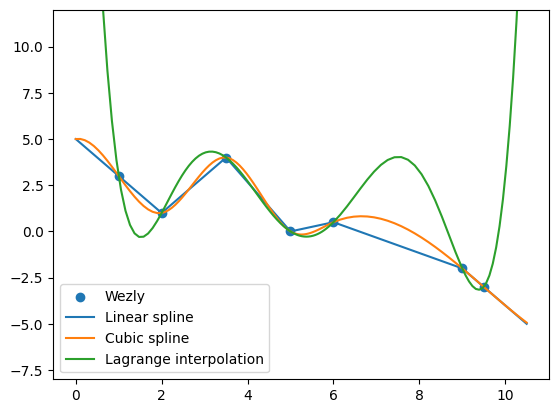

In [62]:
ls_y = []
for i in range(data.shape[0]-1):
    if i == 0:
        iksy = np.linspace(0, data[i+1][0], 20)
    elif i == data.shape[0]-2:
        iksy = np.linspace(data[i][0], 10.5, 20)
    else:
        iksy = np.linspace(data[i][0], data[i + 1][0], 20)

    interpolated = s(iksy, data[i][1], data[i + 1][1], data[i][0], data[i + 1][0])
    ls_y.extend(interpolated)
else:
    plt.scatter(data[:,0], data[:,1], label='Wezly')
    plt.plot(x_space, ls_y, label='Linear spline')
    plt.plot(x_space, cs_y, label='Cubic spline')
    plt.plot(x_space, li_y, label='Lagrange interpolation')
    plt.ylim(-8, 12)
    plt.legend()
    plt.show()

zadanie 3

In [63]:
from scipy.interpolate import CubicSpline

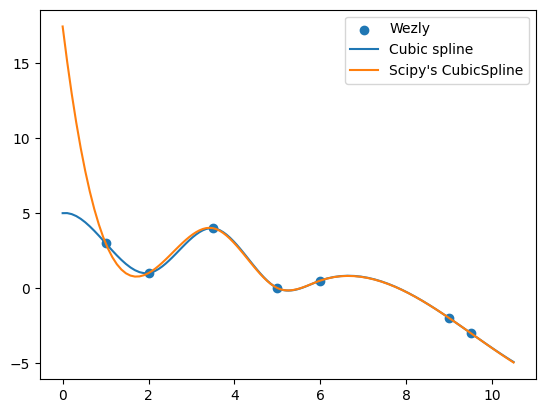

In [64]:
cs = CubicSpline(data[:,0], data[:,1])
plt.scatter(data[:,0], data[:,1], label='Wezly')
plt.plot(x_space, cs_y, label='Cubic spline')
plt.plot(x_space, cs(x_space), label="Scipy's CubicSpline")
plt.legend()
plt.show()

Wykresy się nie pokrywają ze względu na warunek brzegowy zawarty w CubicSpline. Użycie warunku brzegowego 'natural' zamiast standardowego 'not-a-knot' sprawi, że wykresy zaczną się pokrywać.